In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'/content/UberDataset.csv')

In [3]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
try:
    date_parser = lambda x: pd.to_datetime(x, errors='coerce')
    data = pd.read_csv(r'/content/UberDataset.csv', parse_dates=['START_DATE', 'END_DATE'], date_parser=date_parser)
except pd.errors.ParserError as e:
    print("ParserError:", e)
    print("Please check your data for inconsistencies.")

In [6]:
if 'data' in locals():
    # Calculate ride duration in minutes
    data['RIDE_DURATION_MIN'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60

    # Extract hour from START_DATE
    data['HOUR'] = data['START_DATE'].dt.hour
    most_common_peak_hour = data['RIDE_DURATION_MIN'].idxmax()

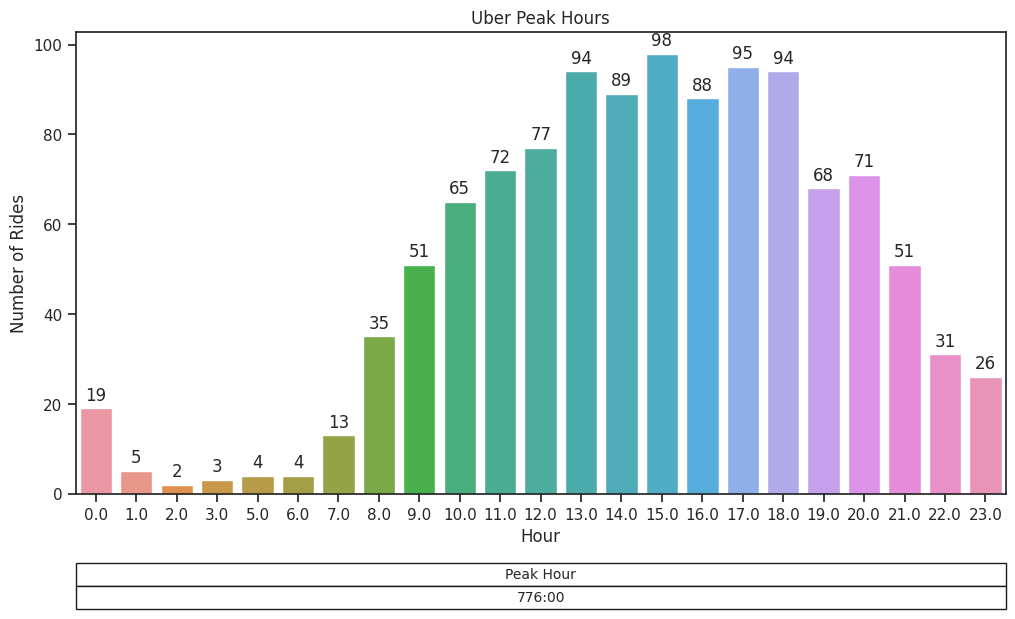

In [12]:
 # Analyze peak hours
most_common_peak_hour = data['RIDE_DURATION_MIN'].idxmax()
peak_hours = data['HOUR'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=peak_hours.index, y=peak_hours.values)
plt.title('Uber Peak Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
for index, value in enumerate(peak_hours):
    plt.text(index, value + 5, str(value), ha='center', va='top')

peak_hours_table = plt.table(cellText=[[f"{most_common_peak_hour}:00"]],
                             cellLoc='center',
                             colLabels=['Peak Hour'],
                             loc='bottom',
                             bbox=[0, -0.25, 1, 0.1])

peak_hours_table.auto_set_font_size(False)
peak_hours_table.set_fontsize(10)
peak_hours_table.scale(1.2, 1.2)

plt.show()

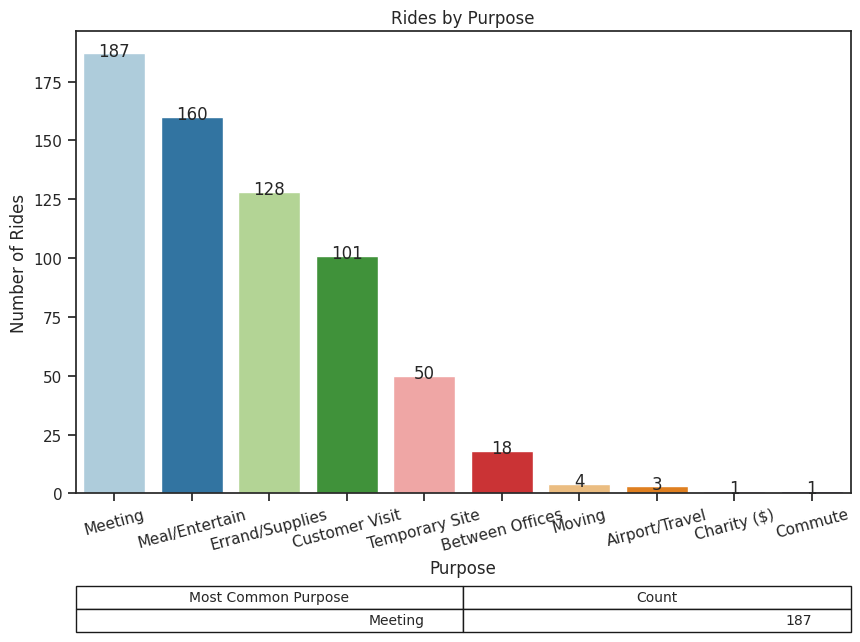

In [13]:
purpose_counts = data['PURPOSE'].value_counts()

most_common_purpose = purpose_counts.idxmax()
most_common_purpose_count = purpose_counts.max()

# Plot rides by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="Paired")
plt.title('Rides by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=15)
for index, value in enumerate(purpose_counts):
    plt.text(index, value + 5, f"{value}", ha='center', va='top')

# Display the most common purpose and count in a table
purpose_table = plt.table(cellText=[[most_common_purpose, most_common_purpose_count]],
                          colLabels=['Most Common Purpose', 'Count'],
                          loc='bottom',
                          bbox=[0, -0.3, 1, 0.1])

purpose_table.auto_set_font_size(False)
purpose_table.set_fontsize(10)
purpose_table.scale(1.2, 1.2)

plt.show()

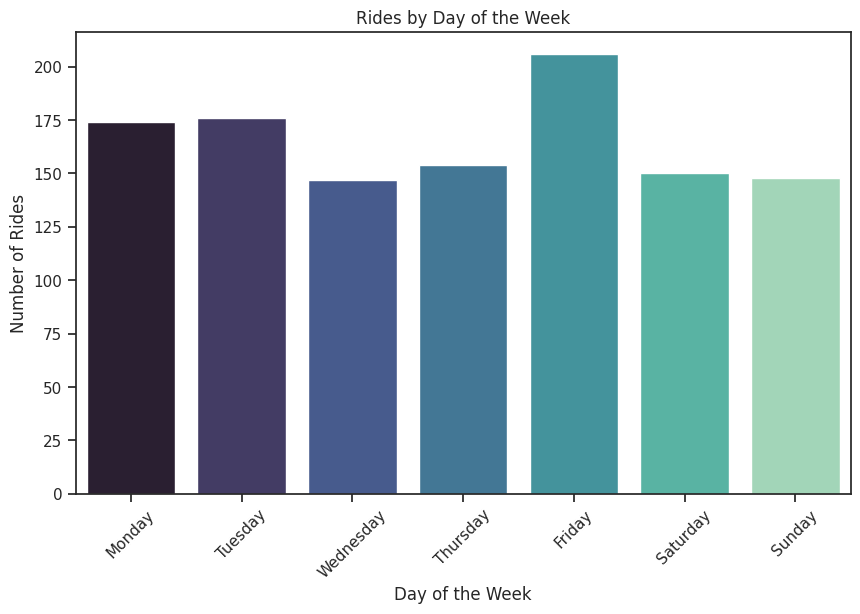

In [14]:
data['DAY_OF_WEEK'] = data['START_DATE'].dt.day_name()

# Analyze rides by day of the week
day_counts = data['DAY_OF_WEEK'].value_counts()

# Sort the days in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)

# Plot rides by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values,palette='mako')
plt.title('Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

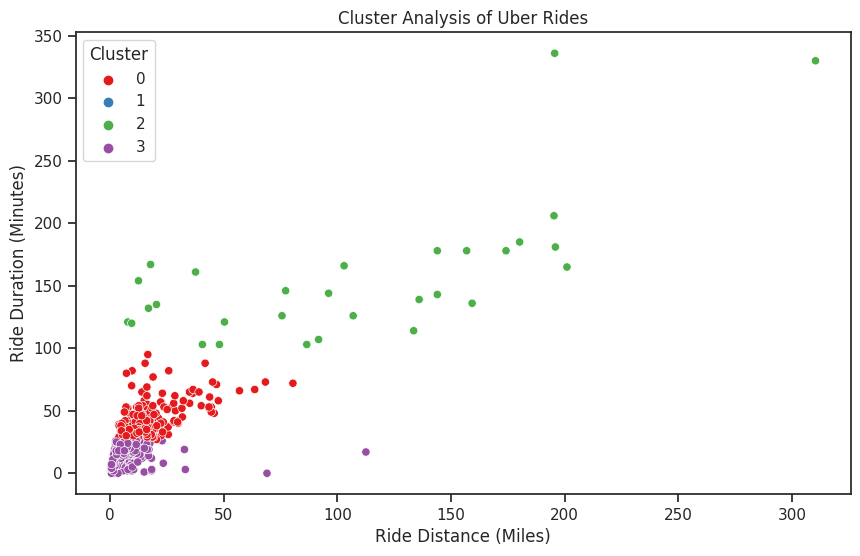

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Select relevant features for clustering (e.g., ride distance and duration)
X = data[['MILES', 'RIDE_DURATION_MIN']]

# Impute missing values (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Perform KMeans clustering
num_clusters = 4  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the distribution of clusters
cluster_counts = data['Cluster'].value_counts()

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES', y='RIDE_DURATION_MIN', hue='Cluster', data=data, palette='Set1')
plt.title('Cluster Analysis of Uber Rides')
plt.xlabel('Ride Distance (Miles)')
plt.ylabel('Ride Duration (Minutes)')
plt.legend(title='Cluster')
plt.show()

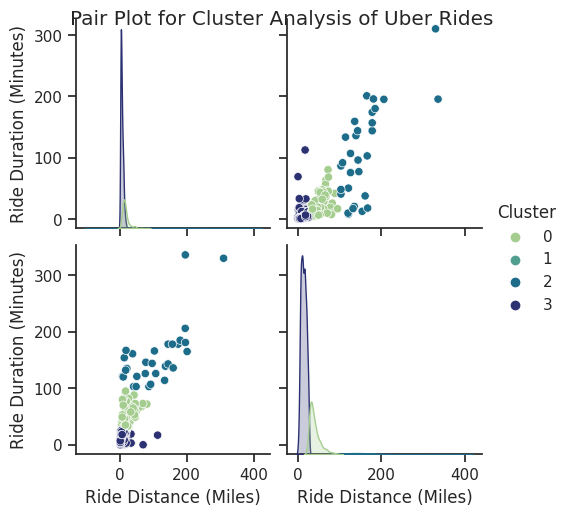

In [16]:
import warnings
warnings.filterwarnings('ignore')
# Select relevant features for clustering (e.g., ride distance and duration)
X = data[['MILES', 'RIDE_DURATION_MIN']]

# Impute missing values (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform KMeans clustering
num_clusters = 4  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a pair plot for cluster analysis with improved visualizations
sns.set(style='ticks')  # Set the style
g = sns.pairplot(data, vars=['MILES', 'RIDE_DURATION_MIN'], hue='Cluster', palette='crest')
g.fig.suptitle('Pair Plot for Cluster Analysis of Uber Rides', y=1.02)
g.set(xlabel='Ride Distance (Miles)', ylabel='Ride Duration (Minutes)')
g._legend.set_title('Cluster')
plt.subplots_adjust(top=1)  # Adjust the position of the title
plt.show()